In [4]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(42)

In [6]:

df = pd.read_csv('/content/Train.csv')
dataset = df.copy()
display(dataset)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Performing basic data cleaning


In [7]:
dataset = dataset.drop(columns = ['ID'])
dataset = dataset[dataset['Profession'].notna()]
dataset = dataset.fillna(0)
dataset = dataset.loc[(dataset[['Graduated', 'Gender', 'Ever_Married', 'Var_1']] != 0).all(axis=1)]


display(dataset)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [8]:
dataset_expanded = dataset.drop(columns = ['Segmentation'])
dataset_expanded = pd.get_dummies(dataset_expanded, sparse = True)
display(dataset_expanded)

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,38,0.0,3.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,40,0.0,6.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8065,33,1.0,1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
8066,27,1.0,4.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


We can see that we have around 28 features now


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
copy = dataset_expanded.copy()

scaler = StandardScaler()
scaler.fit(copy)
X_scale = scaler.transform(copy)
df_scale = pd.DataFrame(X_scale, columns=copy.columns)
display(df_scale)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.288844,-0.412541,0.790981,-0.904760,0.904760,1.189081,-1.189081,1.298162,-1.298162,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,2.243620,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,2.560403,-0.103319,-1.40404,-0.160246
1,-0.330085,-0.712880,0.163936,1.105265,-1.105265,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,3.221543,-0.368983,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,1.759119,-0.420224,-1.239373,-0.129765,-0.236124,-0.331907,2.560403,-0.103319,-1.40404,-0.160246
2,1.407665,-0.412541,-1.090154,1.105265,-1.105265,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,3.221543,-0.368983,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
3,1.407665,-0.712880,-0.463109,-0.904760,0.904760,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,-0.445708,-0.177406,3.438665,-0.193942,-0.568466,2.379685,-1.239373,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
4,-0.210240,-0.712880,2.045070,1.105265,-1.105265,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,2.710155,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,2.379685,-1.239373,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,-0.150318,-0.712880,1.418025,-0.904760,0.904760,-0.840986,0.840986,-0.770320,0.770320,1.45996,-0.308893,-0.310410,-0.368983,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,2.379685,-1.239373,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
7665,-0.509852,0.188138,0.790981,-0.904760,0.904760,1.189081,-1.189081,1.298162,-1.298162,-0.68495,-0.308893,-0.310410,-0.368983,3.502594,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,2.560403,-0.103319,-1.40404,-0.160246
7666,-0.629697,-0.412541,-1.090154,1.105265,-1.105265,1.189081,-1.189081,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,2.243620,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
7667,-0.989232,-0.412541,0.790981,1.105265,-1.105265,1.189081,-1.189081,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,2.243620,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.1287897501946912


We can see that our Silhouette Score is extremely bad at 0.13 which suggests that there are too many features for KMeans



To solve this problem, we will be plotting a heatmap and see for what features the segmentation does not have a appreciable correlation so we can drop these features


In [13]:
dataset_heatmap = df.drop(columns = ['ID'])
dataset_heatmap = dataset_heatmap[dataset_heatmap['Profession'].notna()]
dataset_heatmap = dataset_heatmap.fillna(0)
dataset_heatmap = dataset_heatmap.loc[(dataset_heatmap[['Graduated', 'Gender', 'Ever_Married', 'Var_1']] != 0).all(axis=1)]

dataset_heatmap = pd.get_dummies(dataset_heatmap, sparse = True)
display(dataset_heatmap)

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,38,0.0,3.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,40,0.0,6.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


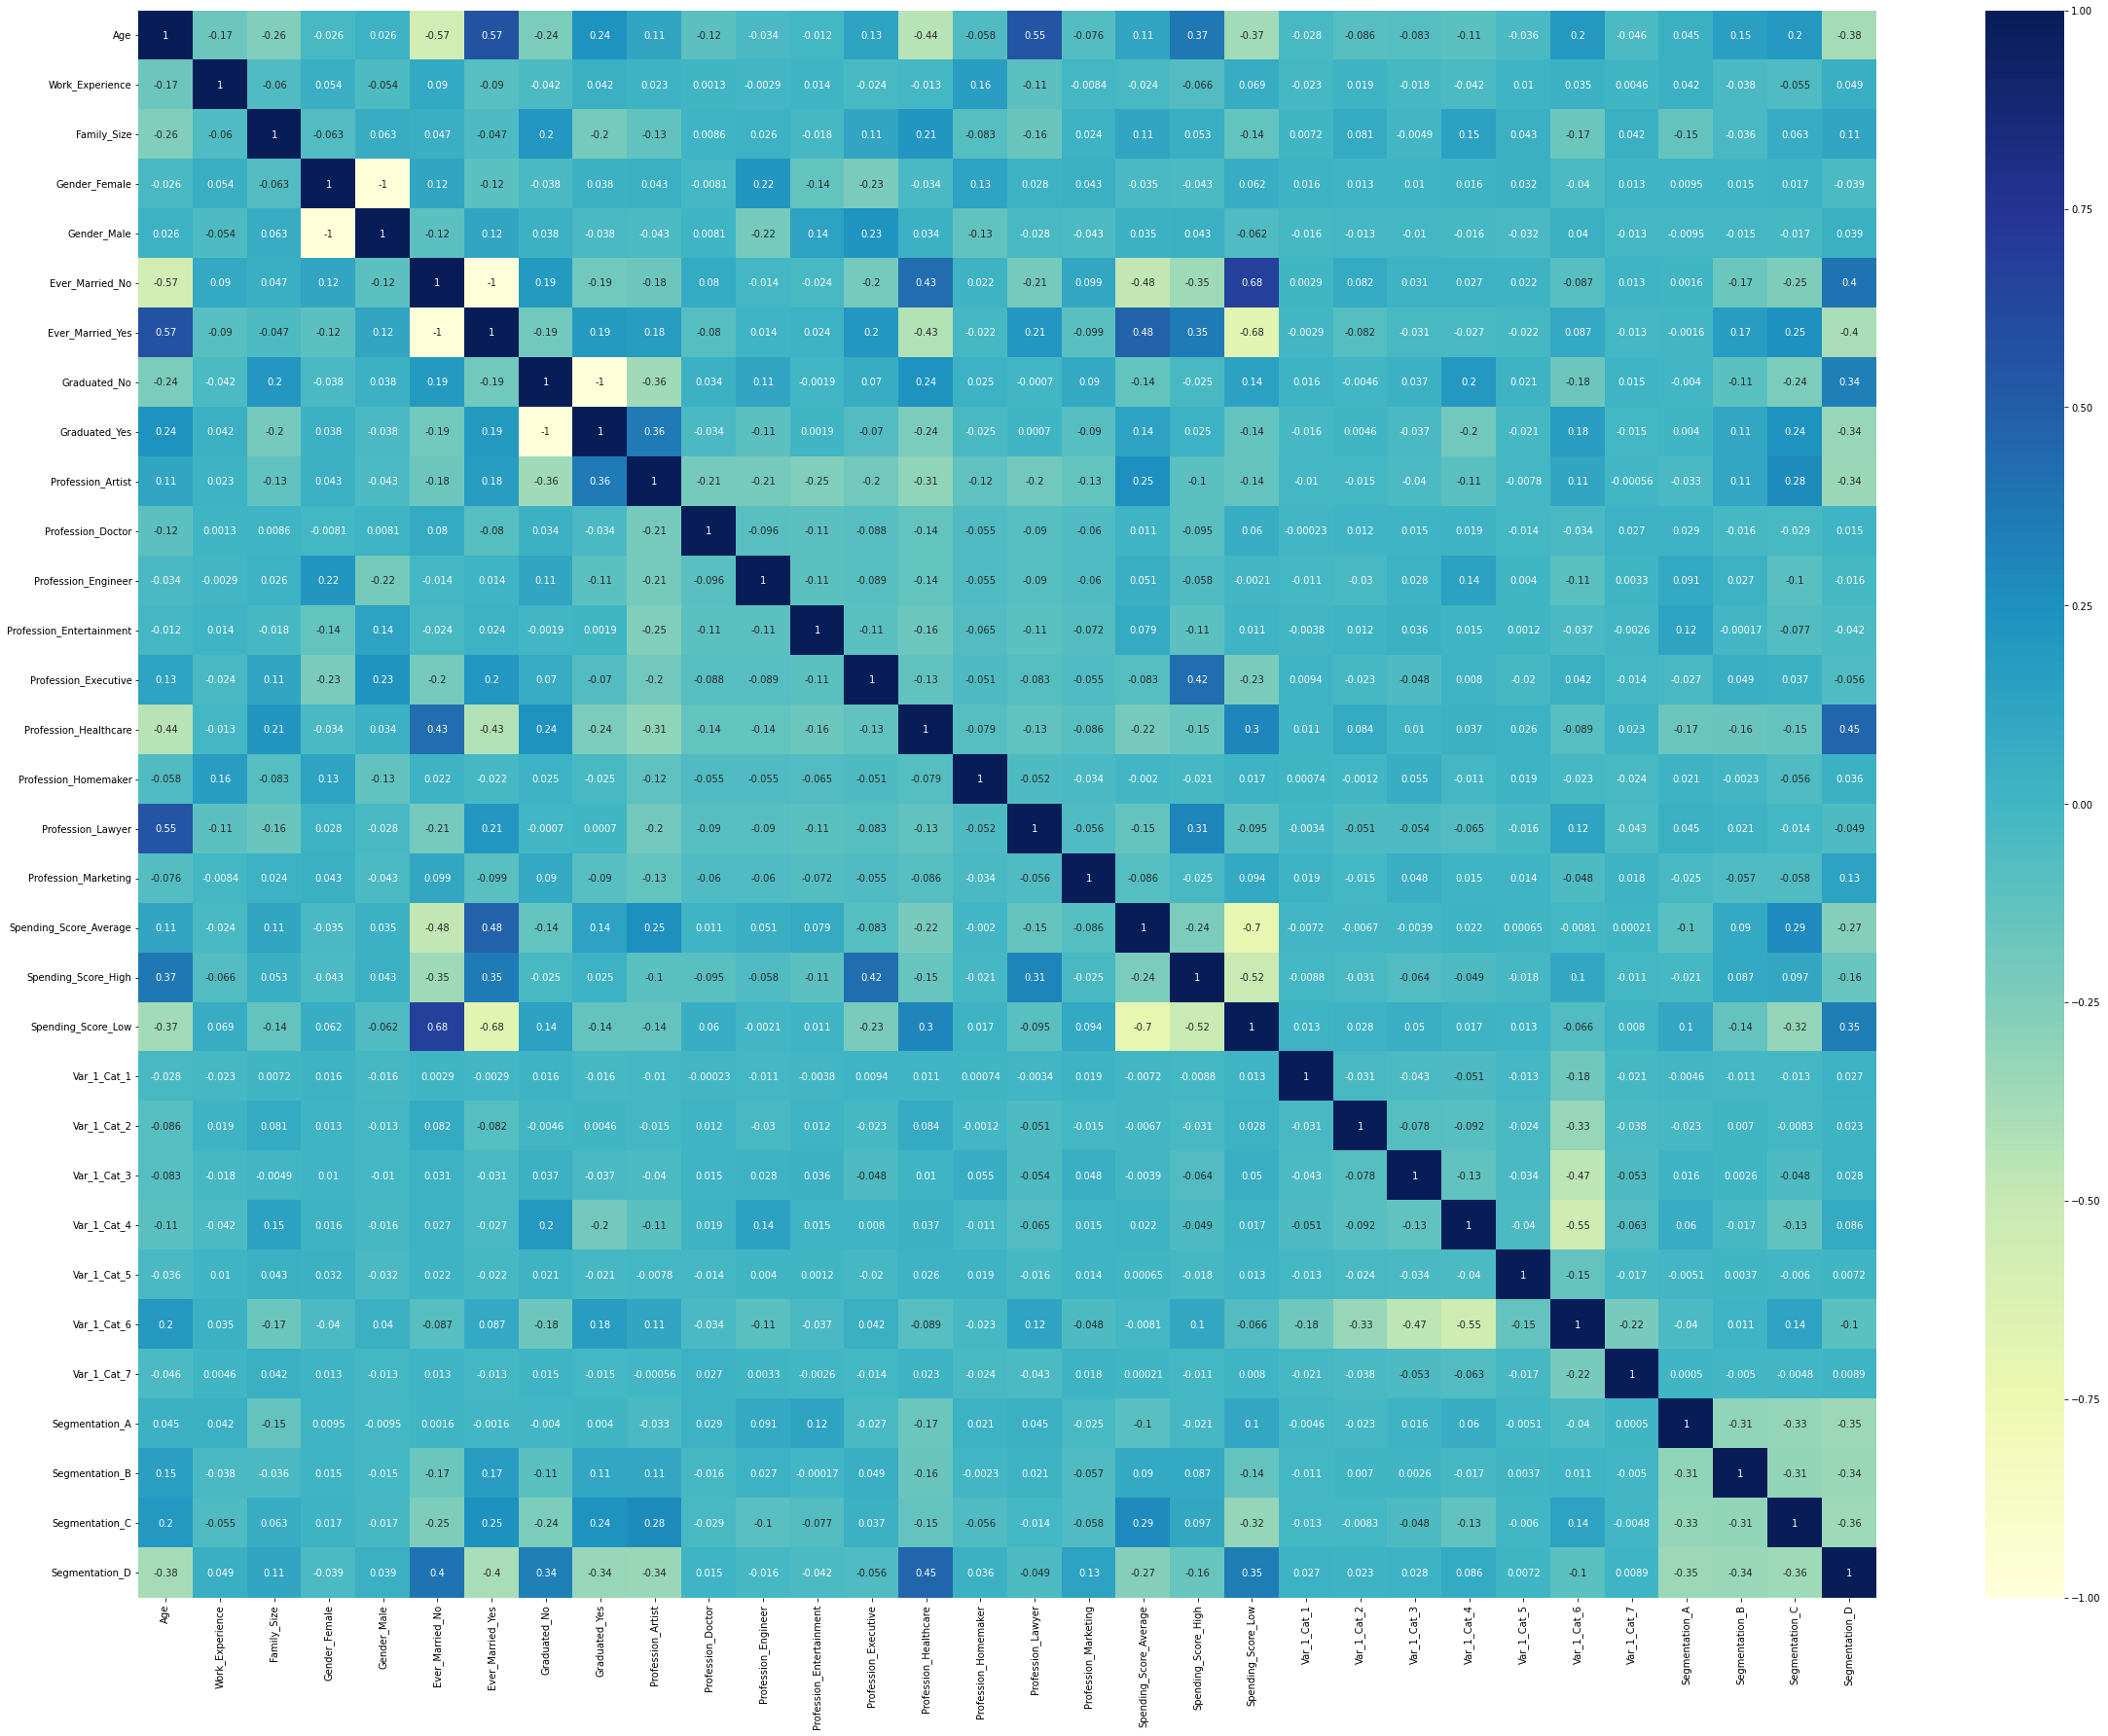

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 30))
  
# plotting correlation heatmap
dataplot = sns.heatmap(dataset_heatmap.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

We can see that the segmentation does not really depend on factors like Gender and Work Experience and the Var_1 column. <br>
That means we can drop these columns for further analysis

In [15]:
dataset_cleaned = df.drop(columns = ['ID','Gender', 'Work_Experience', 'Var_1', 'Segmentation'])
dataset_cleaned = dataset_cleaned[dataset_cleaned['Profession'].notna()]
dataset_cleaned = dataset_cleaned.loc[(dataset_cleaned[['Graduated', 'Ever_Married']] != 0).all(axis=1)]
dataset_cleaned.Graduated.replace(('Yes', 'No'), (1, 0), inplace=True)
dataset_cleaned.Ever_Married.replace(('Yes', 'No'), (1, 0), inplace=True)
dataset_cleaned = dataset_cleaned.dropna()
display(dataset_cleaned)

,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,0.0,22,0.0,Healthcare,Low,4.0
1,1.0,38,1.0,Engineer,Average,3.0
2,1.0,67,1.0,Engineer,Low,1.0
3,1.0,67,1.0,Lawyer,High,2.0
4,1.0,40,1.0,Entertainment,High,6.0
...,...,...,...,...,...,...
8062,1.0,41,1.0,Artist,High,5.0
8064,0.0,35,0.0,Executive,Low,4.0
8065,0.0,33,1.0,Healthcare,Low,1.0
8066,0.0,27,1.0,Healthcare,Low,4.0


In [16]:
dataset_cleaned = pd.get_dummies(dataset_cleaned, sparse = True)


In [17]:
display(dataset_cleaned)

,Ever_Married,Age,Graduated,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0.0,22,0.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.0,38,1.0,3.0,0,0,1,0,0,0,0,0,0,1,0,0
2,1.0,67,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1
3,1.0,67,1.0,2.0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.0,40,1.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1.0,41,1.0,5.0,1,0,0,0,0,0,0,0,0,0,1,0
8064,0.0,35,0.0,4.0,0,0,0,0,1,0,0,0,0,0,0,1
8065,0.0,33,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,1
8066,0.0,27,1.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1


We've successfully managed to reduce the dataset to 16 features from 28


In [18]:
copy2 = dataset_cleaned.copy()

scaler2 = StandardScaler()
scaler2.fit(copy2)
X_scale2 = scaler2.transform(copy2)
df_scale3 = pd.DataFrame(X_scale2, columns=copy2.columns)
display(df_scale3)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


,Ever_Married,Age,Graduated,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,-1.205933,-1.295875,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
1,0.829233,-0.332744,0.766670,0.100015,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,1.731119,-0.425367,-1.216070
2,0.829233,1.412930,0.766670,-1.210135,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
3,0.829233,1.412930,0.766670,-0.555060,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,3.453794,-0.191508,-0.577661,2.350910,-1.216070
4,0.829233,-0.212353,0.766670,2.065239,-0.691964,-0.309277,-0.31032,2.716811,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,0.829233,-0.152157,0.766670,1.410164,1.445162,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070
7430,-1.205933,-0.513331,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,3.470174,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
7431,-1.205933,-0.633723,0.766670,-1.210135,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
7432,-1.205933,-0.994897,0.766670,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321


In [19]:
df_scale4 = df_scale3.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale4)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale4, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale4, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)


KMeans Scaled Silhouette Score: 0.23238024254207695


We can see a clear increase in our silhouette score to 0.23 from 0.13


In [20]:
display(clusters_scale)

,Ever_Married,Age,Graduated,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,cluster_scaled
0,-1.205933,-1.295875,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,1
1,0.829233,-0.332744,0.766670,0.100015,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,1.731119,-0.425367,-1.216070,0
2,0.829233,1.412930,0.766670,-1.210135,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,3
3,0.829233,1.412930,0.766670,-0.555060,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,3.453794,-0.191508,-0.577661,2.350910,-1.216070,2
4,0.829233,-0.212353,0.766670,2.065239,-0.691964,-0.309277,-0.31032,2.716811,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,0.829233,-0.152157,0.766670,1.410164,1.445162,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070,2
7430,-1.205933,-0.513331,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,3.470174,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,3
7431,-1.205933,-0.633723,0.766670,-1.210135,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,1
7432,-1.205933,-0.994897,0.766670,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,1


Try to perfrom elbow, other methods to find suitable clusters


# PCA optional section


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(df_scale4)
reduced = pca.transform(df_scale4)

In [22]:
print(reduced.shape)

(7434, 12)


# T-SNE

In [23]:
from sklearn.manifold import TSNE 
import timeit

# Two Dimensional Plot


In [24]:
start = timeit.default_timer()
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200, random_state = 42)

tsne_scale_results = tsne.fit_transform(copy2)
end = timeit.default_timer()
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
print('t-SNE done! Time elapsed: {} seconds'.format(end-start))

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 7434 samples in 0.000s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


[t-SNE] Computed neighbors for 7434 samples in 1.479s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7434
[t-SNE] Computed conditional probabilities for sample 2000 / 7434
[t-SNE] Computed conditional probabilities for sample 3000 / 7434
[t-SNE] Computed conditional probabilities for sample 4000 / 7434
[t-SNE] Computed conditional probabilities for sample 5000 / 7434
[t-SNE] Computed conditional probabilities for sample 6000 / 7434
[t-SNE] Computed conditional probabilities for sample 7000 / 7434
[t-SNE] Computed conditional probabilities for sample 7434 / 7434
[t-SNE] Mean sigma: 0.967802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.131721
[t-SNE] KL divergence after 5000 iterations: 0.700509
t-SNE done! Time elapsed: 360.190601482 seconds


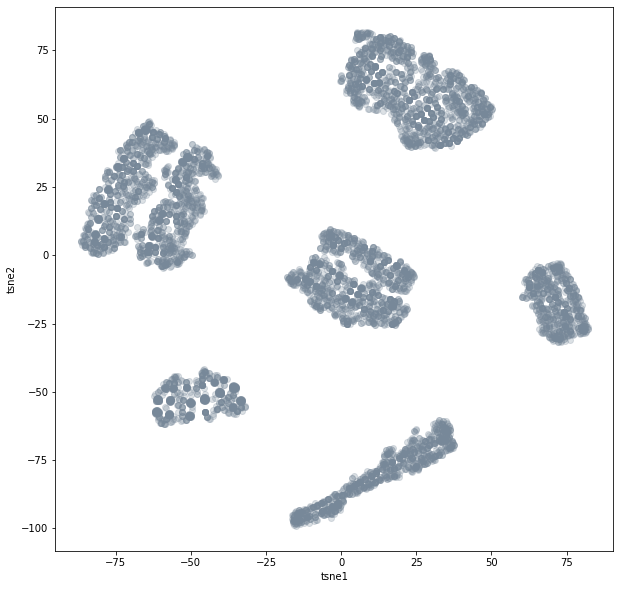

In [25]:
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [26]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.5872189998626709


In [27]:
labels_tsne_scale

array([3, 1, 3, ..., 2, 2, 1], dtype=int32)

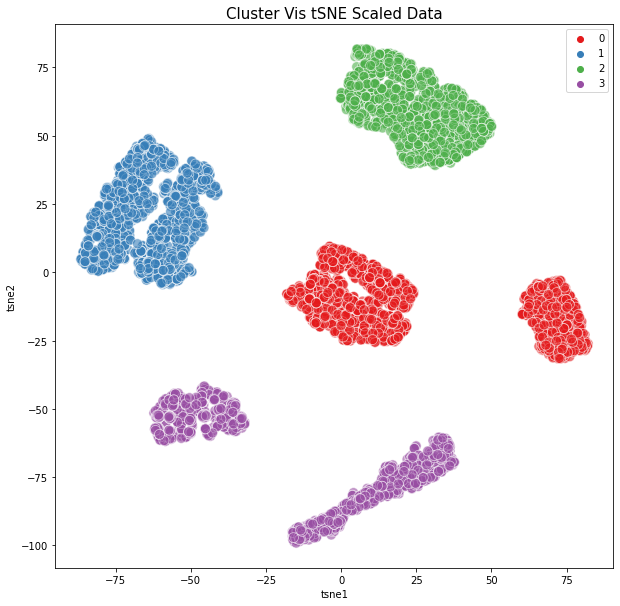

In [28]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = clusters_tsne_scale.iloc[:,0],y = clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [29]:
copy2

,Ever_Married,Age,Graduated,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0.0,22,0.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.0,38,1.0,3.0,0,0,1,0,0,0,0,0,0,1,0,0
2,1.0,67,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1
3,1.0,67,1.0,2.0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.0,40,1.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1.0,41,1.0,5.0,1,0,0,0,0,0,0,0,0,0,1,0
8064,0.0,35,0.0,4.0,0,0,0,0,1,0,0,0,0,0,0,1
8065,0.0,33,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,1
8066,0.0,27,1.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1


In [30]:
from sklearn.decomposition import PCA

In [31]:
start = timeit.default_timer()
pca = PCA(n_components = 2, random_state = 42) 
pca_scale_results = pca.fit_transform(copy2)
end = timeit.default_timer()
pca_df_scale = pd.DataFrame(pca_scale_results, columns=['pc1', 'pc2'])
print('t-SNE done! Time elapsed: {} seconds'.format(end-start))
print(pca.explained_variance_ratio_)

t-SNE done! Time elapsed: 0.023278180999909637 seconds
[0.98642641 0.00779754]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [32]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.5286711782004786


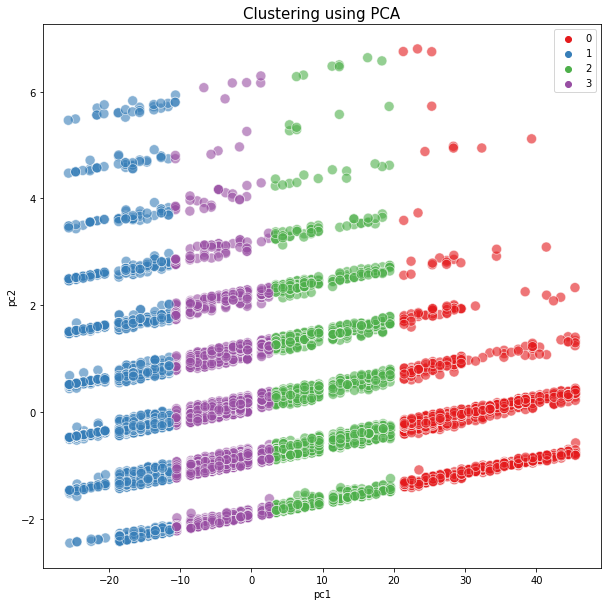

In [33]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = clusters_pca_scale.iloc[:,0],y = clusters_pca_scale.iloc[:,1],hue=labels_pca_scale, palette='Set1', s=100, alpha=0.6).set_title('Clustering using PCA', fontsize=15)
plt.legend()
plt.show()

# 3 Dimensional Plot

In [34]:
start = timeit.default_timer()
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200, random_state = 42)

tsne_scale_results = tsne.fit_transform(copy2)
end = timeit.default_timer()
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
print('t-SNE done! Time elapsed: {} seconds'.format(end-start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 7434 samples in 0.000s...
[t-SNE] Computed neighbors for 7434 samples in 1.457s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7434
[t-SNE] Computed conditional probabilities for sample 2000 / 7434
[t-SNE] Computed conditional probabilities for sample 3000 / 7434
[t-SNE] Computed conditional probabilities for sample 4000 / 7434
[t-SNE] Computed conditional probabilities for sample 5000 / 7434
[t-SNE] Computed conditional probabilities for sample 6000 / 7434
[t-SNE] Computed conditional probabilities for sample 7000 / 7434
[t-SNE] Computed conditional probabilities for sample 7434 / 7434
[t-SNE] Mean sigma: 0.967802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.716682
[t-SNE] KL divergence after 5000 iterations: 0.569906
t-SNE done! Time elapsed: 1277.0689499219998 seconds


In [35]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.444500595331192


In [36]:
import plotly.graph_objs as go

In [37]:
Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))
labels = labels_tsne_scale
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [38]:
start = timeit.default_timer()
pca = PCA(n_components = 3, random_state = 42) 
pca_scale_results = pca.fit_transform(copy2)
end = timeit.default_timer()
pca_df_scale = pd.DataFrame(pca_scale_results, columns=['pc1', 'pc2', 'pc3'])
print('PCA done! Time elapsed: {} seconds'.format(end-start))
print(pca.explained_variance_ratio_)

PCA done! Time elapsed: 0.05515623099995537 seconds
[0.98642641 0.00779754 0.00162805]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [39]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.5225822486130006


In [40]:
Scene = dict(xaxis = dict(title  = 'pc1'),yaxis = dict(title  = 'pc2'),zaxis = dict(title  = 'pc3'))
labels = labels_pca_scale
trace = go.Scatter3d(x=clusters_pca_scale.iloc[:,0], y=clusters_pca_scale.iloc[:,1], z=clusters_pca_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# GMM


In [41]:
df_scale5 = df_scale3.copy()

In [42]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(df_scale5)
clusters = gmm.predict(df_scale5)
print(gmm.aic(df_scale5))

-462011.8445346434


In [43]:
tsne_df_scale_1=tsne_df_scale

In [44]:
cgmm_tsne_scale = pd.concat([tsne_df_scale_1, pd.DataFrame({'tsne_clusters':clusters})], axis=1)

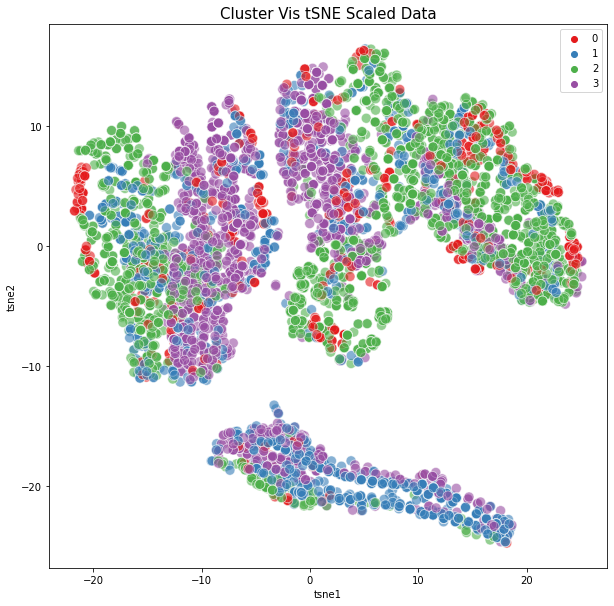

In [45]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=cgmm_tsne_scale.iloc[:,0], y=cgmm_tsne_scale.iloc[:,1], hue=clusters, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [46]:
gmm_tsne_scale = GaussianMixture(n_components=4).fit(tsne_df_scale_1)
labels_tsne_scale_1 = gmm_tsne_scale.predict(tsne_df_scale_1)
clusters_tsne_scale_1 = pd.concat([tsne_df_scale_1, pd.DataFrame({'tsne_clusters':labels_tsne_scale_1})], axis=1)

In [47]:
clusters_tsne_scale_1

,tsne1,tsne2,tsne3,tsne_clusters
0,3.857377,-5.055264,-25.433178,0
1,-5.458518,1.729529,-4.565308,0
2,-4.081480,-20.087898,7.438601,2
3,-2.985244,-16.647686,7.206093,2
4,-9.004492,2.513856,-0.307571,0
...,...,...,...,...
7429,-9.778801,5.048193,-0.543261,0
7430,-10.401194,-4.563913,-5.142917,0
7431,13.160997,9.973798,-3.845623,1
7432,20.085144,-0.473961,-6.441664,1


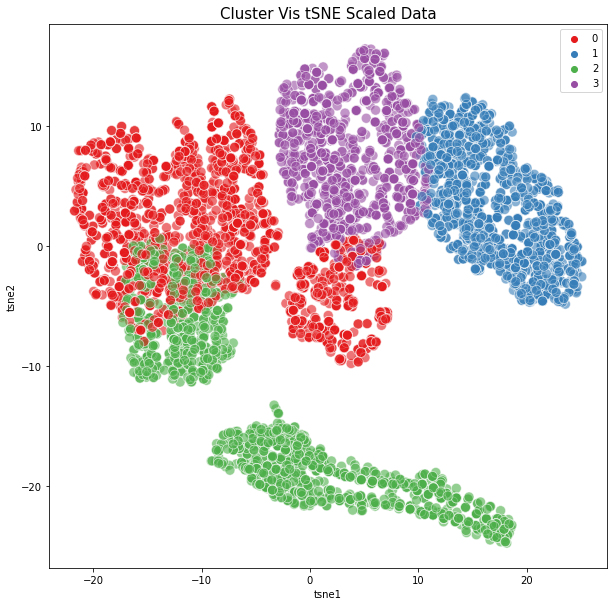

In [48]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=clusters_tsne_scale_1.iloc[:,0], y=clusters_tsne_scale_1.iloc[:,1], hue=labels_tsne_scale_1, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

Mean Shift Clustering


In [49]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [68]:
bandwidth = estimate_bandwidth(df_scale5, quantile=0.2)
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(df_scale5)
labels = msmodel.labels_
cluster_center = msmodel.cluster_centers_
labelsno = len(np.unique(labels))

print("No of Clusters: %d" % labelsno)

No of Clusters: 4


In [86]:
y_predms  =msmodel.predict(df_scale5)

In [69]:
tsne_df_scale_2=tsne_df_scale

In [91]:
ms_tsne_scale = pd.concat([tsne_df_scale_2, pd.DataFrame({'tsne_clusters':y_predms})], axis=1)

In [92]:
ms_tsne_scale

,tsne1,tsne2,tsne3,tsne_clusters
0,3.857377,-5.055264,-25.433178,0
1,-5.458518,1.729529,-4.565308,0
2,-4.081480,-20.087898,7.438601,0
3,-2.985244,-16.647686,7.206093,1
4,-9.004492,2.513856,-0.307571,0
...,...,...,...,...
7429,-9.778801,5.048193,-0.543261,0
7430,-10.401194,-4.563913,-5.142917,0
7431,13.160997,9.973798,-3.845623,0
7432,20.085144,-0.473961,-6.441664,0


In [89]:
tsne_df_scale_2

,tsne1,tsne2,tsne3
0,3.857377,-5.055264,-25.433178
1,-5.458518,1.729529,-4.565308
2,-4.081480,-20.087898,7.438601
3,-2.985244,-16.647686,7.206093
4,-9.004492,2.513856,-0.307571
...,...,...,...
7429,-9.778801,5.048193,-0.543261
7430,-10.401194,-4.563913,-5.142917
7431,13.160997,9.973798,-3.845623
7432,20.085144,-0.473961,-6.441664


In [ ]:
bandwidth = estimate_bandwidth(tsne_df_scale_2, quantile=0.2,n_samples=800 )
msmodel2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel2.fit(tsne_df_scale_2)
labelsms = msmodel2.labels_
cluster_centerms = msmodel2.cluster_centers_
labelsnom = len(np.unique(labelsms))

print("No of Clusters: %d" % labelsnom)

No of Clusters: 4


In [94]:
cluster_centerms

array([[ -3.907714 ,   3.8781977,  11.075032 ],
       [ 17.158073 ,   3.11325  ,  -4.886799 ],
       [  2.0527158, -19.134813 ,   0.4660937],
       [  2.1065302,  -4.2965384, -29.77897  ]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



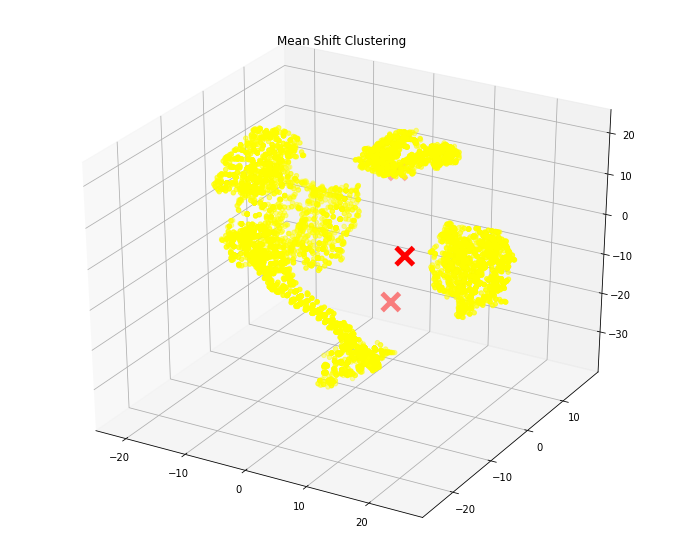

In [105]:
meanfig = plt.figure(figsize=(12, 10))

axis = meanfig.add_subplot(111, projection ='3d')

axis.scatter(ms_tsne_scale.iloc[:, 0], ms_tsne_scale.iloc[:, 1], ms_tsne_scale.iloc[:, 2], marker ='o',color ='yellow')
axis.scatter(cluster_centerms[0,:], cluster_centerms[1,:],cluster_centerms[2,:],cluster_centerms[3,:], marker ='x', color ='red',s = 300, linewidth = 5, zorder = 10)
plt.title('Mean Shift Clustering')  
plt.show()